In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from numpy import mean

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Declare a Base using `automap_base()`
base = automap_base()
# Use the Base class to reflect the database tables
base.prepare(autoload_with=engine)

In [8]:
# Print all of the classes mapped to the Base
base.classes.keys()

['measurement', 'station']

In [9]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
measurement = base.classes.measurement
station = base.classes.station

In [10]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

NameError: name 'ticker' is not defined

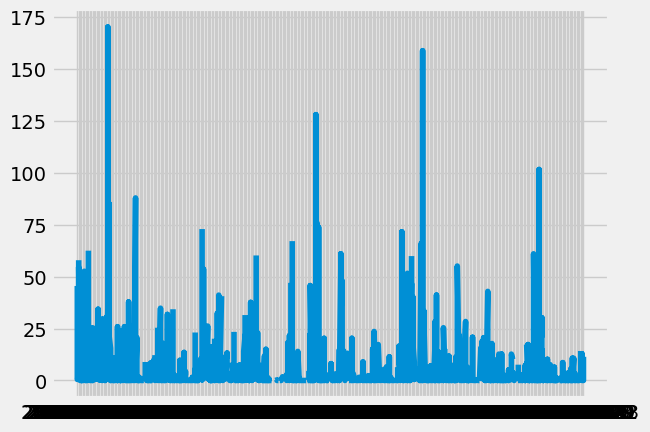

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_data = pd.DataFrame(prcp_query, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
prcp_data = prcp_data.sort_values(by=["Date"])

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.plot(prcp_data["Date"], prcp_data["Precipitation"])
max_xticks = 6
ax.xaxis.set_major_locator(ticker.MaxNLocator(max_xticks))
plt.xlabel("Date")
plt.ylim(0, max(prcp_data["Precipitation"])+15)
plt.ylabel("mm")
plt.xticks(rotation=90)
plt.legend(["Precipitation"])
plt.MaxNLocator(3)
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
quartiles = prcp_data["Precipitation"].quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
middle=quartiles[0.5]

summary = ({"count": prcp_data["Precipitation"].count(),
                        "mean": prcp_data["Precipitation"].sum()/prcp_data["Precipitation"].count(),
                        "std": prcp_data["Precipitation"].std(),
                        "min": prcp_data["Precipitation"].min(),
                        "25%": lowerq,
                        "50%": middle,
                        "75%": upperq,
                        "max":prcp_data["Precipitation"].max()
                       })

summary

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_query = session.query(measurement).group_by(measurement.station).count()
print(station_query)

9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_query = session.query(measurement.station, func.count(measurement.prcp)).group_by(measurement.station).all()
active_query = sorted(active_query, key=lambda x: x[1], reverse=True)
active_query

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = active_query[0][0]
station_query = session.query(measurement.tobs).\
    filter(measurement.station == active_station).all()

summary2 = ({"Lowest:": min(station_query),
             "Highest:": max(station_query),
             "Average:": mean(station_query)
            })

summary2

{'Lowest:': (12.2,), 'Highest:': (29.4,), 'Average:': 22.035822510822513}

<function matplotlib.pyplot.show(close=None, block=None)>

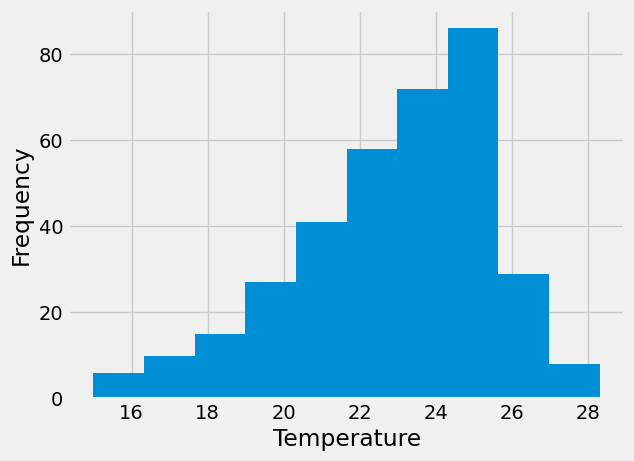

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_query = session.query(measurement.tobs).\
    filter(measurement.station == active_station).\
    filter(measurement.date > year_ago).all()

station_data = pd.DataFrame(station_query, columns = ["tobs"])
plt.hist(station_data)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show

# Close Session

In [17]:
# Close Session
session.close()